<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Передобрабтка-данных" data-toc-modified-id="Передобрабтка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Передобрабтка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Цветовая-палитра" data-toc-modified-id="Цветовая-палитра-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Цветовая палитра</a></span></li><li><span><a href="#График-компаний-с-самым-большим-кол-вом-вакансий" data-toc-modified-id="График-компаний-с-самым-большим-кол-вом-вакансий-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>График компаний с самым большим кол-вом вакансий</a></span></li><li><span><a href="#График-самых-популярный-названий-в-вакансиях" data-toc-modified-id="График-самых-популярный-названий-в-вакансиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График самых популярный названий в вакансиях</a></span></li><li><span><a href="#График-самых-популярных-местоположений-вакансий-по-их-численности-(круговая-диаграмма)" data-toc-modified-id="График-самых-популярных-местоположений-вакансий-по-их-численности-(круговая-диаграмма)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>График самых популярных местоположений вакансий по их численности (круговая диаграмма)</a></span></li><li><span><a href="#График-популярности-по-колонке-Type-of-ownership,-относительно-численности-вакансий" data-toc-modified-id="График-популярности-по-колонке-Type-of-ownership,-относительно-численности-вакансий-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>График популярности по колонке Type of ownership, относительно численности вакансий</a></span></li><li><span><a href="#График-популярности-по-секторам-работы" data-toc-modified-id="График-популярности-по-секторам-работы-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>График популярности по секторам работы</a></span></li><li><span><a href="#График-по-секторам-работы-и-среднему-уровеню-зарплат-в-них" data-toc-modified-id="График-по-секторам-работы-и-среднему-уровеню-зарплат-в-них-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>График по секторам работы и среднему уровеню зарплат в них</a></span></li><li><span><a href="#Гистограмму-распределения-рейтинга-компаний" data-toc-modified-id="Гистограмму-распределения-рейтинга-компаний-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Гистограмму распределения рейтинга компаний</a></span></li><li><span><a href="#График-средних-зарплат-по-популярным-компаниям" data-toc-modified-id="График-средних-зарплат-по-популярным-компаниям-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>График средних зарплат по популярным компаниям</a></span></li><li><span><a href="#Облако-тегов" data-toc-modified-id="Облако-тегов-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Облако тегов</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ вакансий Data Engineer

**Задачи**

Используя датасет https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs: 
* Построить график компаний с самым большим кол-вом вакансий
* Построить график самых популярный названий в вакансиях
* Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
* Построить график популярности по колонке Type of ownership, относительно численности вакансий
* Построить график популярности по секторам работы
* Построить график используя сектора работы и средний уровень зарплат в них
* Построить гистограмму распределения рейтинга компаний
* Построить график средних зарплат по популярным компаниям
* Построить по описанию вакансий облако тегов, исследовать самые популярные слова

*Примечание: В графиках использовать основные цвета сайта hh.ru*

## Передобрабтка данных

Импортируем библиотеки

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly
import plotly.express as px
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

In [68]:
pth = 'DataEngineer.csv'

if os.path.exists(pth):
    df = pd.read_csv('DataEngineer.csv')
else:
    print('File not found')

Посмотрим данные

In [69]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB
None


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


По результату осмотра видим, что явные пропуски в данных отсутствуют. Присутствуют аномалии в виде значений `-1` в столбцах Competitors	и Easy Apply. Имеем всего 2 числовых признака. Остальные - категориальные. Уровень зарплат необходимо будет преобразоать в числовой тип.

Для начала уберем артефакты `\n` из Job Description и Company Name

In [70]:
df['Job Description'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
df['Company Name'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 

Преобразуем столбец Salary Estimate	в среднюю зарплату.

In [71]:
def avg_salary(salary_cat):
    salary = re.findall(r'\d+', salary_cat)
    if len(salary) == 1:
        avg_sal = np.int16(salary)
    elif len(salary) > 1:
        avg_sal = (np.int16(salary[0]) + np.int16(salary[1])) / 2
    else:
        avg_sal = 0
        
    return avg_sal

df['Avg Salary'] = df['Salary Estimate'].apply(avg_salary)

In [72]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg Salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description Sagence is a management ad...,4.5,Sagence 4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities - Architect, build, and m...",3.4,Enterprise Integration 3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview Job description Position Overview: Se...,5.0,Maestro Technologies 5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position This position will support ...,4.8,Jane Street 4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,115.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer Job Details Level Experienced Jo...,3.7,GNY Insurance Companies 3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,115.0


Проверим есть ли вакансии без указания ЗП

In [73]:
df[df['Avg Salary'] == 0]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg Salary


Отлично таковых нет.

Посмотрим аномальные значения `-1` в других столбцах.

In [74]:
print('Количество значений "-1" в столбцах.')
for i in df.columns:
    rate = (df.loc[df[i] == '-1', i].count() + df.loc[df[i] == -1, i].count()) / len(df)
    if rate > 0:
        print(f'{i}: {rate:.2%}')

Количество значений "-1" в столбцах.
Rating: 9.26%
Headquarters: 4.91%
Size: 4.71%
Founded: 22.59%
Type of ownership: 4.71%
Industry: 14.95%
Sector: 14.83%
Revenue: 4.71%
Competitors: 69.19%
Easy Apply: 94.22%


Столбцы Competitors и Easy Apply не будут задействованы в нашем анализе. Их можно удалить полностью.

Size и Type of ownership возможно пересекаются. Можно проверить.

Пропуски в Headquarters можно заполнить значением из Location. Или убрать.

Industry и Sector можно заменить на UNKNOWN после предобработки других столбцов.

Rating имеет числовой тип. Заменить -1 на UNKNOWN не выйдет. Удалим строки с пропусками.


In [75]:
df = df.drop(['Competitors', 'Easy Apply'], axis=1)

In [76]:
df.query('Headquarters == "-1"')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg Salary
114,Data Engineer,$84K-$113K (Glassdoor est.),We are looking for a data engineer to manage a...,-1.0,Pierce Technology Corp,"New York, NY",-1,-1,-1,-1,-1,-1,-1,98.5
161,Data Engineer,$105K-$121K (Glassdoor est.),What You'll Do:We are looking for a data engin...,-1.0,Atom Finance,"New York, NY",-1,-1,-1,-1,-1,-1,-1,113.0
163,Data Engineer,$105K-$121K (Glassdoor est.),Job Details Level Experienced Job Location New...,-1.0,Greater New York Mutual Insurance Companies (GNY),"New York, NY",-1,-1,-1,-1,-1,-1,-1,113.0
165,Data Engineer,$105K-$121K (Glassdoor est.),About UsSimon Data was founded in 2015 by a te...,-1.0,Simondata,"New York, NY",-1,-1,-1,-1,-1,-1,-1,113.0
182,Data Engineer,$105K-$121K (Glassdoor est.),Role Background: Were looking for agreat Data ...,-1.0,Carter Wellington Limited,"New York, NY",-1,-1,-1,-1,-1,-1,-1,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,Data Engineer - Big Data-Hadoop,$30K-$60K (Glassdoor est.),Analyze and understand data sources & APIs• De...,-1.0,"Object Technology Solutions, Inc. (OTSI)","Irving, TX",-1,-1,-1,-1,-1,-1,-1,45.0
2415,"Developer, Data Engineer Big Data",$30K-$60K (Glassdoor est.),"OTSI is searching for a Developer, Data Engine...",-1.0,"Object Technology Solutions, Inc. (OTSI)","Irving, TX",-1,-1,-1,-1,-1,-1,-1,45.0
2419,Data Network Engineer,$30K-$60K (Glassdoor est.),This position will be responsible for the miss...,-1.0,Brightstar Media Organization,"Grand Prairie, TX",-1,-1,-1,-1,-1,-1,-1,45.0
2427,Data Integration Engineer II,$100K-$160K (Glassdoor est.),Job Description The Data Integration Engineer ...,-1.0,Outsourced CIO LLC,"Arlington, TX",-1,-1,-1,-1,-1,-1,-1,130.0


Имеем 124 объекста. Можем попробовать дозополнить недостоющую информацию о компаниях по названию и расположению компании, но можем удалить значения с таким количеством пропусков для экономии времени. Тем более, что их немного.

In [77]:
df = df.drop(df[df['Headquarters'] == '-1'].index)

Аналогично, избавимся от пропусков в Rating.

In [78]:
df = df.drop(df[df['Rating'] == -1].index)

Посмотрим пропуски ещё раз.

In [79]:
print('Количество значений "-1" в столбцах.')
for i in df.columns:
    rate = df.loc[df[i] == '-1', i].count() / len(df)
    if rate > 0:
        print(f'{i}: {rate:.2%}')

Количество значений "-1" в столбцах.
Industry: 7.42%
Sector: 7.29%


Осталось 2 столбца с пропусками. Заменим на UNKNOWN.

In [80]:
df.loc[df['Industry'] == '-1', 'Industry'] = 'UNKNOWN'
df.loc[df['Sector'] == '-1', 'Sector'] = 'UNKNOWN'

Проверим дублекаты.

In [81]:
df.duplicated().sum()

11

Удалим дублекаты.

In [82]:
df = df.drop_duplicates()

Итоговые данные

In [83]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 0 to 2527
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2279 non-null   object 
 1   Salary Estimate    2279 non-null   object 
 2   Job Description    2279 non-null   object 
 3   Rating             2279 non-null   float64
 4   Company Name       2279 non-null   object 
 5   Location           2279 non-null   object 
 6   Headquarters       2279 non-null   object 
 7   Size               2279 non-null   object 
 8   Founded            2279 non-null   int64  
 9   Type of ownership  2279 non-null   object 
 10  Industry           2279 non-null   object 
 11  Sector             2279 non-null   object 
 12  Revenue            2279 non-null   object 
 13  Avg Salary         2279 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 267.1+ KB
None


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg Salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description Sagence is a management ad...,4.5,Sagence 4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities - Architect, build, and m...",3.4,Enterprise Integration 3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),115.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview Job description Position Overview: Se...,5.0,Maestro Technologies 5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),115.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position This position will support ...,4.8,Jane Street 4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,115.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer Job Details Level Experienced Jo...,3.7,GNY Insurance Companies 3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),115.0


## Анализ данных

### Цветовая палитра

In [84]:
print('Цветовая палитра hh.ru')
palette = ['#f70700', '#060606', '#ffffff', '#f7fafa', '#c5d3d3', '#3a4e58']
sns.color_palette(palette)

Цветовая палитра hh.ru


[(0.9686274509803922, 0.027450980392156862, 0.0),
 (0.023529411764705882, 0.023529411764705882, 0.023529411764705882),
 (1.0, 1.0, 1.0),
 (0.9686274509803922, 0.9803921568627451, 0.9803921568627451),
 (0.7725490196078432, 0.8274509803921568, 0.8274509803921568),
 (0.22745098039215686, 0.3058823529411765, 0.34509803921568627)]

### График компаний с самым большим кол-вом вакансий

In [85]:
company_top15 = df['Company Name'].value_counts()[:15]
company_name_top15 = company_top15.index

px.bar(company_top15, color_discrete_sequence=palette, title='Топ-15 по числу вакансий')

### График самых популярный названий в вакансиях

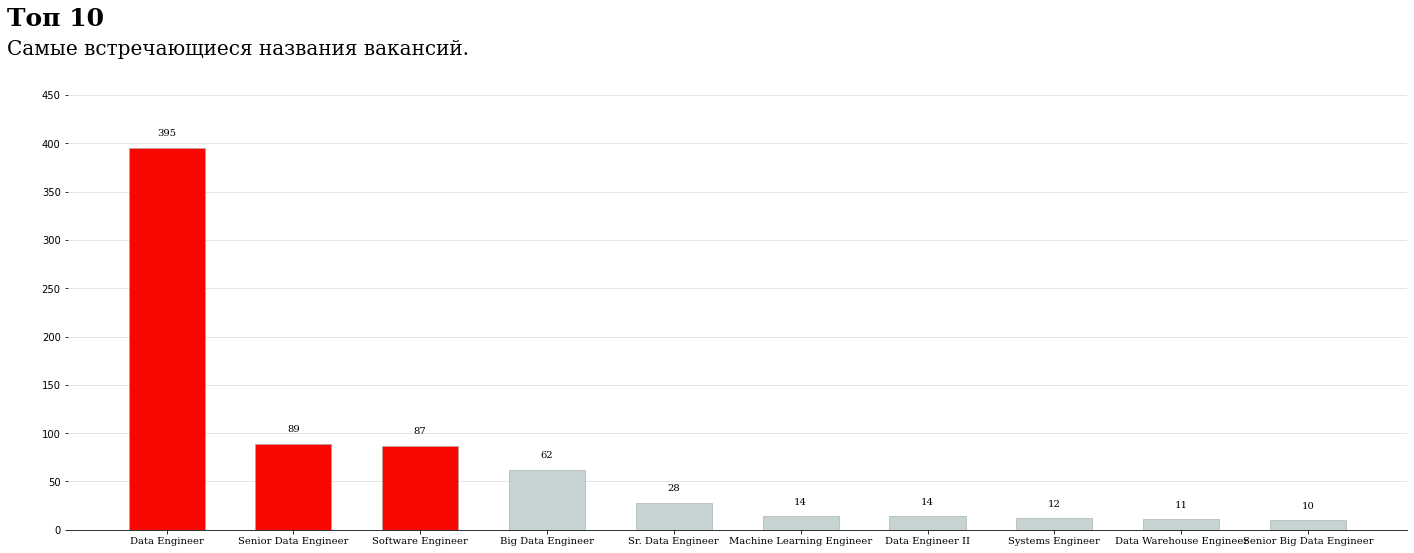

In [96]:
job_names_top = df['Job Title'].value_counts()[:10]

# фон

color_map = ['#c5d3d3' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#f70700'

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.bar(job_names_top.index, job_names_top, width=0.6, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# подписи

for i in job_names_top.index:
    ax.annotate(f"{job_names_top[i]}", 
                   xy=(i, job_names_top[i] + 15), va = 'center', ha='center', fontweight='light', fontfamily='serif')

# убираем рамку

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# метки

ax.set_xticklabels(job_names_top.index, fontfamily='serif', rotation=0)

# название и подзаголовок

fig.text(0.09, 1, 'Топ 10 ', fontsize=25, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Самые встречающиеся названия вакансий.', fontsize=20, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 500, 50)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

### График самых популярных местоположений вакансий по их численности (круговая диаграмма)

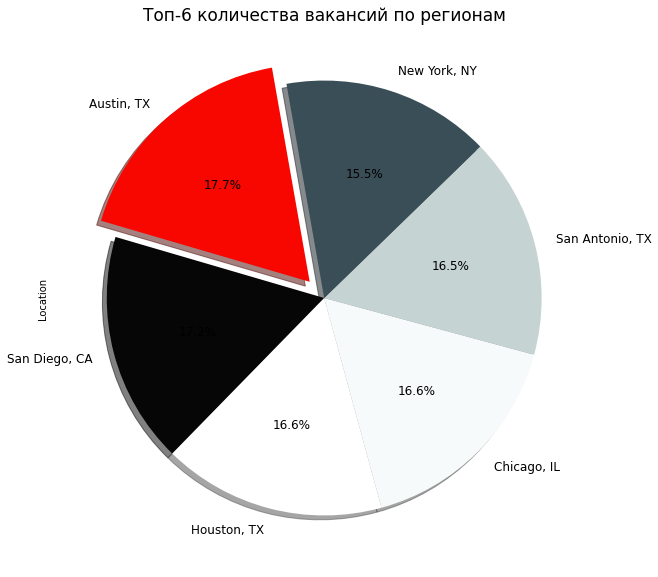

In [87]:
job_location_top = df['Location'].value_counts()[:6]

explode = (0.1, 0, 0, 0, 0, 0)
job_location_top.plot(colors=palette, kind='pie', explode=explode, autopct='%1.1f%%', startangle=100, fontsize=12, figsize=(10, 10), normalize=True, shadow=True)
plt.title('Топ-6 количества вакансий по регионам', fontsize=17)
plt.show()

В Austin больше всего вакансий.

### График популярности по колонке Type of ownership, относительно численности вакансий

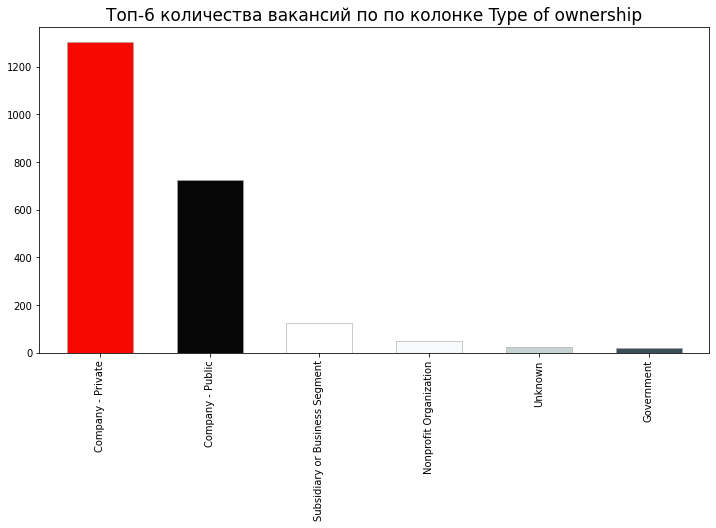

In [88]:
ownership_top = df['Type of ownership'].value_counts()[:6]
ownership_top.plot(kind='bar', figsize=(12, 6), color=palette, width=0.6, edgecolor='darkgray', linewidth=0.6)
plt.title('Топ-6 количества вакансий по по колонке Type of ownership', fontsize=17)
plt.show()

### График популярности по секторам работы

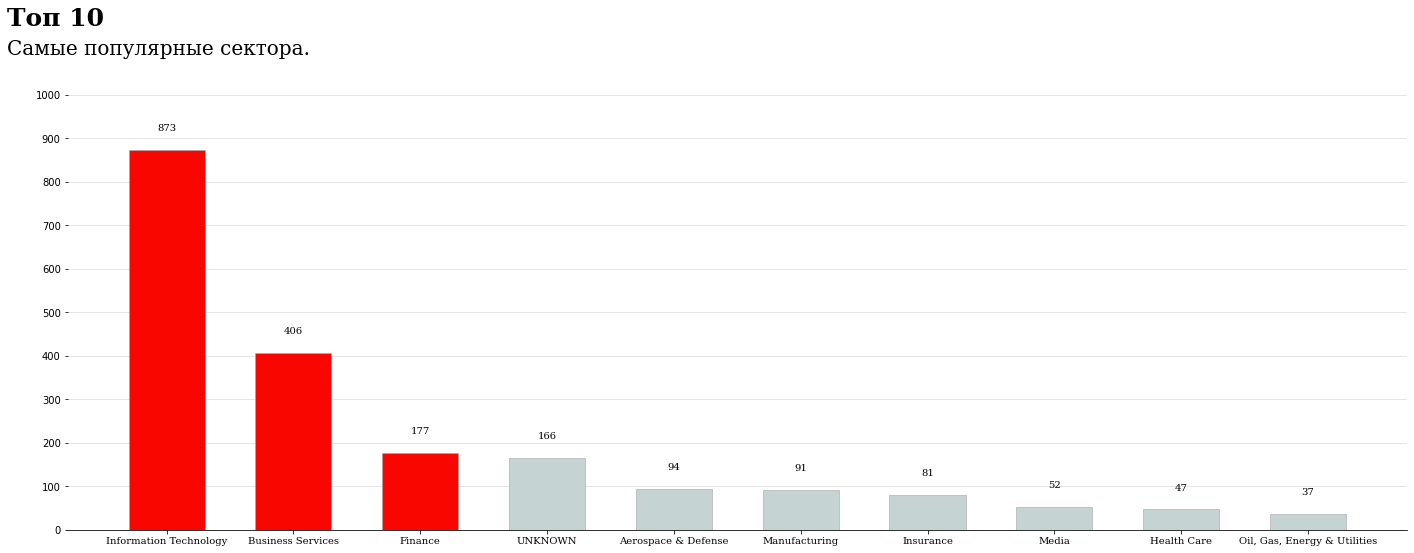

In [97]:
job_names_top = df['Sector'].value_counts()[:10]

# фон

color_map = ['#c5d3d3' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#f70700'

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.bar(job_names_top.index, job_names_top, width=0.6, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# подписи
for i in job_names_top.index:
    ax.annotate(f"{job_names_top[i]}", 
                   xy=(i, job_names_top[i] + 50), va = 'center', ha='center', fontweight='light', fontfamily='serif')

# убтраем рамку

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# метки

ax.set_xticklabels(job_names_top.index, fontfamily='serif', rotation=0)

# название и подзаголовок

fig.text(0.09, 1, 'Топ 10 ', fontsize=25, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Самые популярные сектора.', fontsize=20, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1100, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

### График по секторам работы и среднему уровеню зарплат в них

,Avg Salary
Sector,
Biotech & Pharmaceuticals,112.314286
Media,111.076923
Health Care,107.787234
Accounting & Legal,106.259259
Non-Profit,105.750000
Information Technology,104.928408
Manufacturing,103.681319
UNKNOWN,103.030120
Consumer Services,102.181818


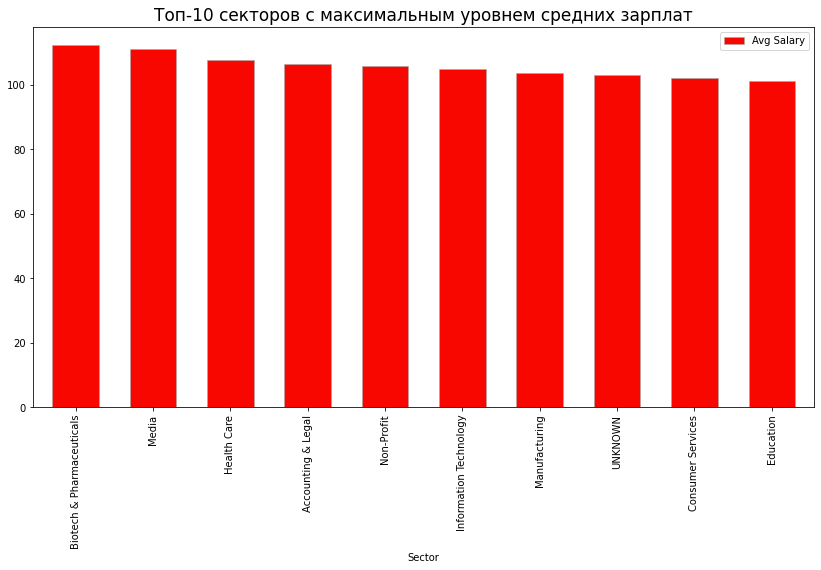

In [90]:
sectors_salary = df.pivot_table(index='Sector', values='Avg Salary', aggfunc='mean').sort_values(by='Avg Salary', ascending=False)[:10]
display(sectors_salary)
sectors_salary.plot(kind='bar', figsize=(14, 7), color=palette, width=0.6, edgecolor='darkgray', linewidth=0.6)
plt.title('Топ-10 секторов с максимальным уровнем средних зарплат', fontsize=17)
plt.show()


Самые высокие средние зарплаты в сфере биотехнологий и фармацевтики.

### Гистограмму распределения рейтинга компаний

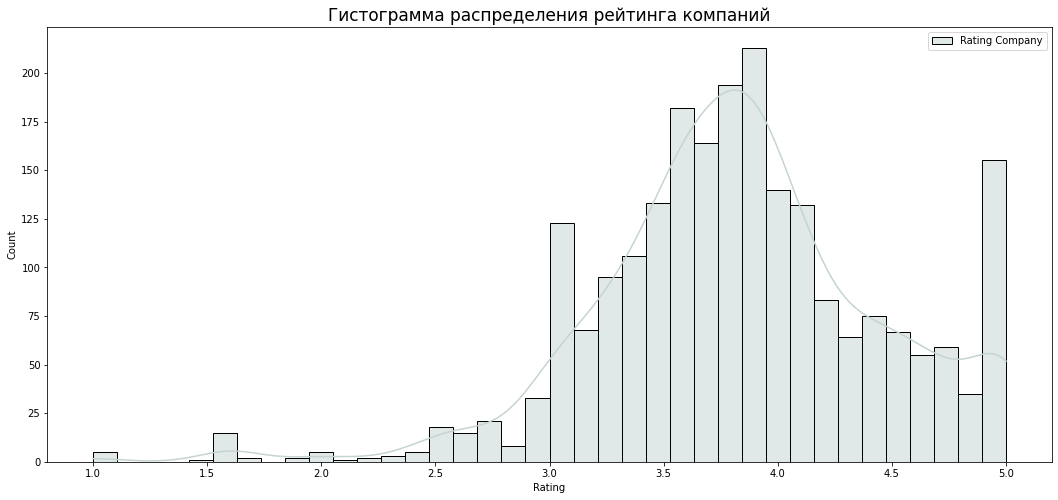

In [91]:
plt.figure(figsize=(18, 8))
sns.histplot(df['Rating'], 
             kde=True, 
             color='#c5d3d3', 
             label='Rating Company')
plt.legend()
plt.title('Гистограмма распределения рейтинга компаний', fontsize=17)
plt.show()

Большинство компаний имеют рейтинг от 3 до 4.5. Пик - около 3.8.

### График средних зарплат по популярным компаниям

,Avg Salary
Company Name,
EY 3.8,217.5
AmeriHealth Caritas 3.1,217.5
JLA 3.7,217.5
Sandbox Banking 4.0,204.0
SOLUTE 3.1,204.0
Stem 3.2,204.0
University of California - San Diego Medical Centers 3.6,204.0
Truvian Sciences 4.5,204.0
SVK Technology Solutions Inc 5.0,204.0


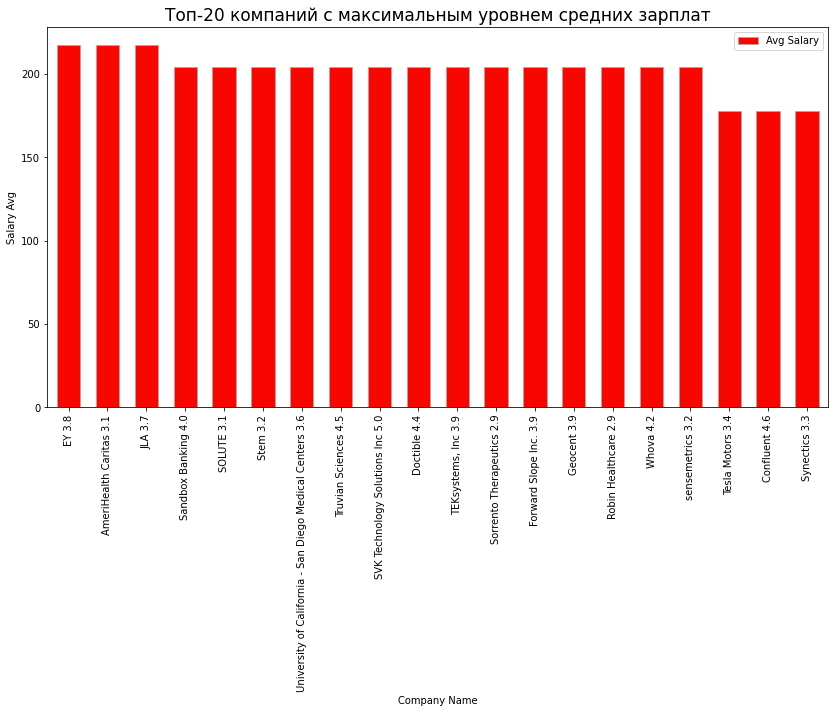

In [92]:
top_company_salary = df.pivot_table(index='Company Name', values='Avg Salary', aggfunc='mean').sort_values(by='Avg Salary', ascending=False)[:20]
display(top_company_salary)
top_company_salary.plot(kind='bar', figsize=(14, 7), color=palette, width=0.6, edgecolor='darkgray', linewidth=0.6)
plt.ylabel('Salary Avg')
plt.title('Топ-20 компаний с максимальным уровнем средних зарплат', fontsize=17)
plt.show()

### Облако тегов

Построим ублако тегов по описанию вакансий Job Description.

In [93]:
col_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f70700', '#3a4e58'])

text = re.sub(r'[,\'.\(\[\]\)\\]', '', str(list(df['Job Description'])))

wordcloud = WordCloud(background_color = 'white', width = 800,  height = 300, colormap=col_map, max_words = 200).generate(text)

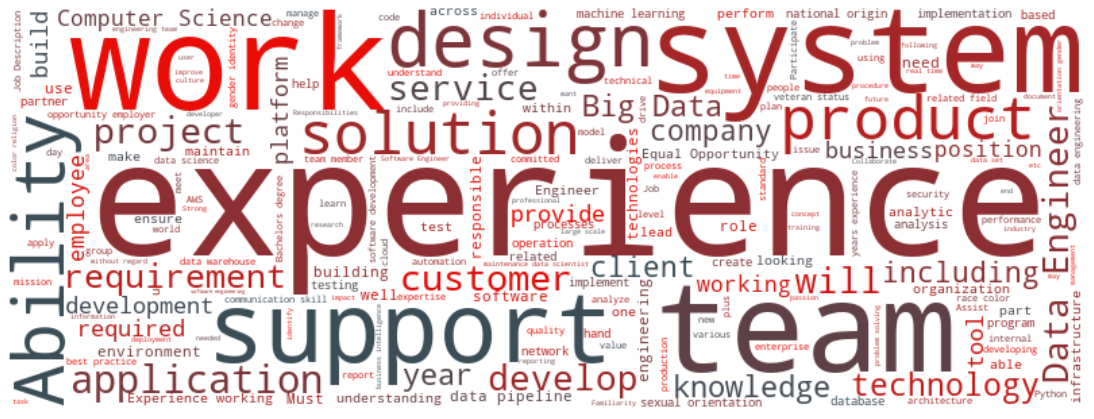

In [94]:
plt.figure( figsize=(15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Самые часто встречающиеся слова - опыт, работа и команда.

## Вывод

Мы провели анализ предоставленного датасета и установили, что:
* Самое большое количество вакансий в Amazon .
* Самое популярное название вакансии - Data Engineer.
* Наибольшее число вакансий в регионе Austin, TX.
* Большинство компаний по типу собственности относятся к Company - Private.
* Самый популярный сектор -IT.
* Самый высокий уровень зарплат в Biotech & Pharmaceuticals	и Media.
* Большинство компаний имеют рейтинг от 3 до 4.5. 
* Максимальный уровень средних зарплат в компаниях: JLA, Stellent IT LLC, AmeriHealth Caritas, EY
* Самые часто встречающиеся слова в описании вакансий - опыт, работа и команда.